## Making plots for one trial

In [1]:
%%capture
%run SubhaloWAstropy.ipynb

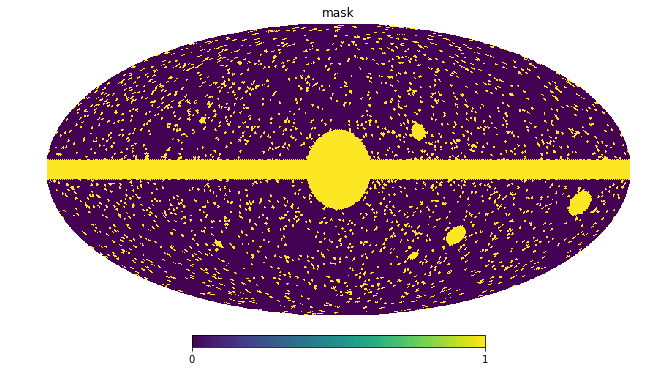

In [2]:
hp.mollview(mask, title="mask")

Text(0.5,1,'dN/dm distribution')

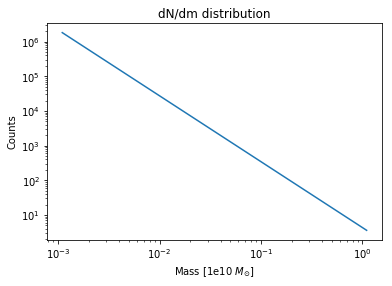

In [3]:
m_test = np.logspace(np.log10(mMin), np.log10(mMax), 1000)
plt.plot(m_test, dNdm_func(m_test))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Mass [1e10 $M_{\odot}$]")
plt.ylabel("Counts")
plt.title("dN/dm distribution")

Text(0,0.5,'Counts')

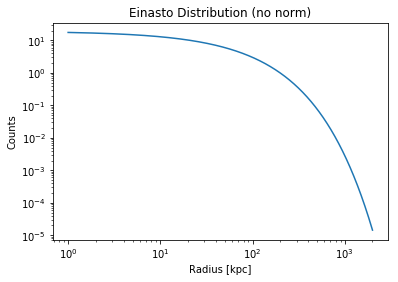

In [4]:
r_test = np.logspace(0, np.log10(2000), 60500)
plt.plot(r_test, rho_Ein(r_test))
plt.xscale("log")
plt.yscale("log")
plt.title("Einasto Distribution (no norm)")
plt.xlabel("Radius [kpc]")
plt.ylabel("Counts")

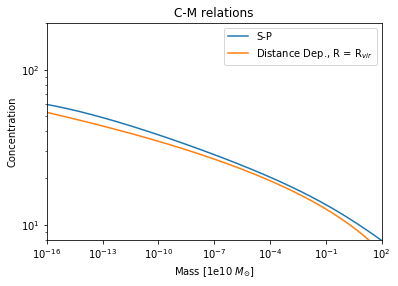

In [5]:
plt.plot(np.logspace(-16, 2, 1000), c200_SP(np.logspace(-16, 2, 1000)), label="S-P")
plt.plot(np.logspace(-16, 2, 1000), c200_S(np.logspace(-16, 2, 1000), 402), label="Distance Dep., R = R$_{vir}$")
plt.title("C-M relations")
plt.ylabel("Concentration")
plt.xlabel("Mass [1e10 $M_{\odot}$]")
plt.xscale("log")
plt.yscale("log")
plt.ylim(8, 200)
plt.xlim(1e-16, 1e2)
plt.legend()

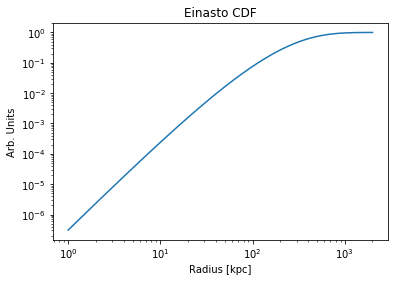

In [6]:
plt.plot(r_arr, cum_N/cum_N[-1])
plt.ylabel("Arb. Units")
plt.xlabel("Radius [kpc]")
plt.title("Einasto CDF")
plt.xscale("log")
plt.yscale("log")

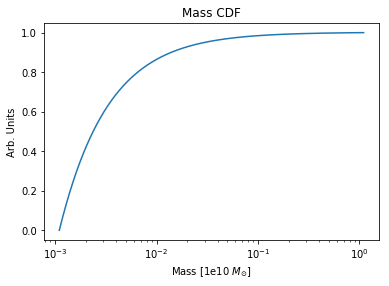

In [7]:
plt.plot(m_arr, (m_arr**(-.9)-m_arr[0]**(-.9))/(m_arr[-1]**(-.9)-m_arr[0]**(-.9)))
plt.ylabel("Arb. Units")
plt.xlabel("Mass [1e10 $M_{\odot}$]")
plt.title("Mass CDF")
plt.xscale("log")

In [8]:
print(PPnoxsec_arr)

[2.97868399e-05]


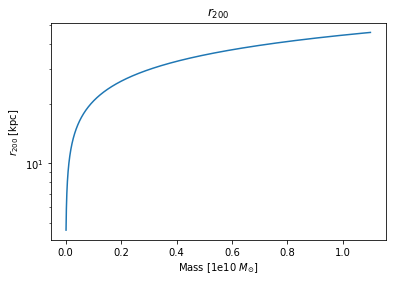

In [9]:
plt.plot(m_arr, ( 3 * m_arr / (4 * np.pi * 200. * constants.rho_c) )**(1./3.))
plt.title("$r_{200}$")
plt.xlabel("Mass [1e10 $M_{\odot}$]")
plt.ylabel("$r_{200}$ [kpc]")
plt.yscale("log")

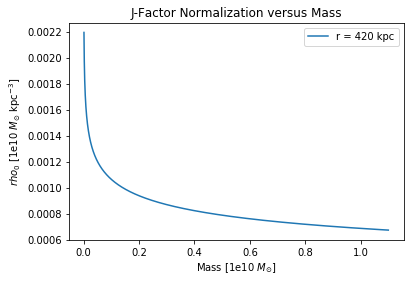

In [10]:
r200 = ( 3 * m_arr / (4 * np.pi * 200. * constants.rho_c) )**(1./3.)
rs = r200/c200_S( m_arr, 420 )
plt.plot(m_arr, m_arr / ( 4 * np.pi * rs**3 * (np.log( (rs + r200) / rs) - r200/(rs+r200))), label="r = 420 kpc")
plt.title("J-Factor Normalization versus Mass")
plt.ylabel("$rho_{0}$ [1e10 $M_{\odot}$ kpc$^{-3}$]")
plt.xlabel("Mass [1e10 $M_{\odot}$]")
plt.legend()

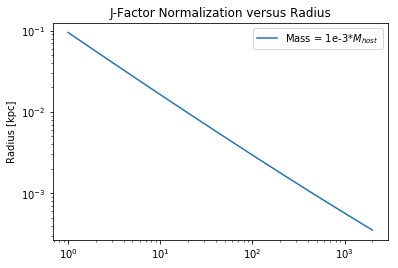

In [11]:
r200 = ( 3 * 1e-3*M_MW / (4 * np.pi * 200. * constants.rho_c) )**(1./3.)
rs = r200/c200_S( 1e-3*M_MW, r_arr )
plt.plot(r_arr, 1e-3*M_MW / ( 4 * np.pi * rs**3 * (np.log( (rs + r200) / rs) - r200/(rs+r200))), label="Mass = 1e-3*$M_{host}$")
plt.title("J-Factor Normalization versus Radius")
plt.ylabel("$rho_{0}$ [1e10 $M_{\odot}$ kpc$^{-3}$]")
plt.ylabel("Radius [kpc]")
plt.yscale("log")
plt.xscale("log")
plt.legend()

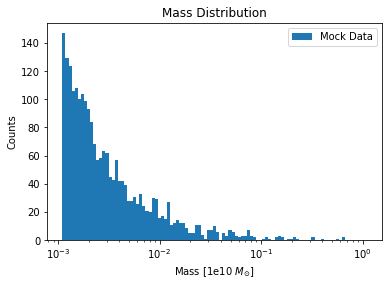

In [12]:
mass_arr, rval_arr, theta_arr, phi_arr, dA_vals, b_vals, l_vals, subhalos_J = get_fluxes()[1:]
plt.hist(mass_arr, np.logspace(np.log10(mMin), np.log10(mMax), 100), label="Mock Data")
plt.title("Mass Distribution")
plt.ylabel("Counts")
plt.xlabel("Mass [1e10 $M_{\odot}$]")
plt.xscale("log")
plt.legend()

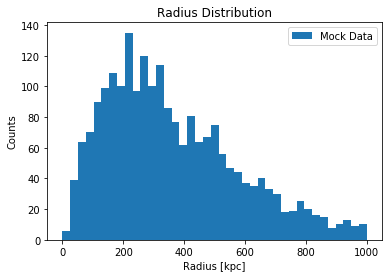

In [13]:
plt.hist(rval_arr, np.linspace(0, (1000), 40), label="Mock Data")
plt.ylabel("Counts")
plt.title("Radius Distribution")
plt.xlabel("Radius [kpc]")
#plt.xscale("log")
plt.legend()

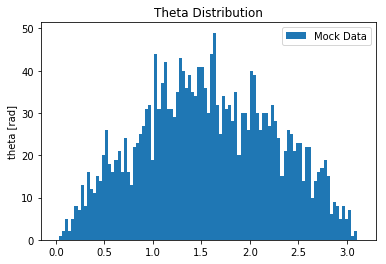

In [14]:
plt.hist(theta_arr, np.linspace(0,np.pi, 100), label="Mock Data")
plt.title("Theta Distribution")
plt.ylabel("Counts")
plt.ylabel("theta [rad]")
plt.legend()

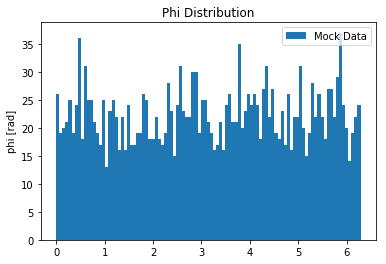

In [15]:
plt.hist(phi_arr, np.linspace(0,2*np.pi, 100), label="Mock Data")
plt.title("Phi Distribution")
plt.ylabel("Counts")
plt.ylabel("phi [rad]")
plt.legend()

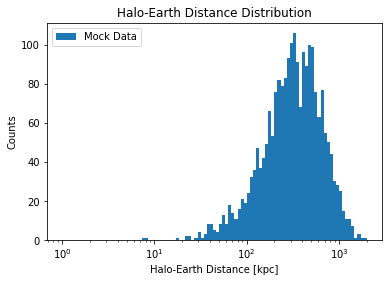

In [16]:
plt.hist(dA_vals, np.logspace(0, np.log10(2000), 100), label="Mock Data")
plt.title("Halo-Earth Distance Distribution")
plt.ylabel("Counts")
plt.xlabel("Halo-Earth Distance [kpc]")
plt.xscale("log")
plt.legend()

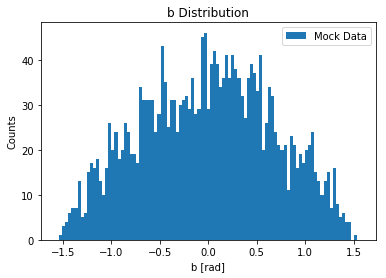

In [17]:
plt.hist(b_vals, np.linspace(-np.pi/2.,np.pi/2., 100), label="Mock Data")
plt.title("b Distribution")
plt.ylabel("Counts")
plt.xlabel("b [rad]")
plt.legend()

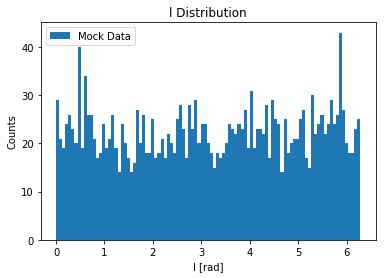

In [18]:
plt.hist(l_vals, np.linspace(0,2*np.pi, 100), label="Mock Data")
plt.title("l Distribution")
plt.ylabel("Counts")
plt.xlabel("l [rad]")
plt.legend()

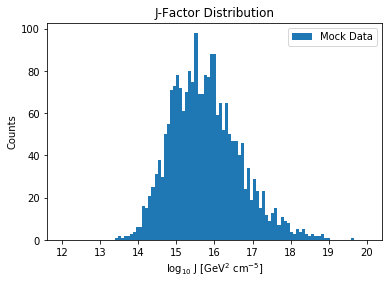

In [19]:
bins = plt.hist(np.log10(subhalos_J), bins=np.linspace(12,20,100), label="Mock Data")
plt.title("J-Factor Distribution")
plt.ylabel("Counts")
plt.xlabel("log$_{10}$ J [GeV$^2$ cm$^{-5}$]")
plt.legend()

/home/jean/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


(-1, 4.2)

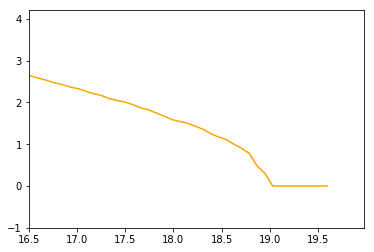

In [20]:
cum_J = []
N = np.sum(bins[0])
for J in bins[0]:
    cum_J.append(N)
    N -= J
plt.plot(bins[1][:-1], np.log10(cum_J), c="orange")
plt.xlim(16.5)
plt.ylim(-1,4.2)
#plt.plot(bins[1], 20.-bins[1])

(1e+17, 1e+22)

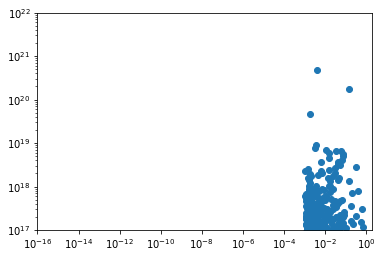

In [21]:
plt.scatter(mass_arr, subhalos_J)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-16, 2)
plt.ylim(1e17, 1e22)

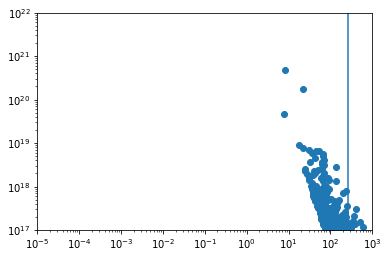

In [22]:
plt.scatter(dA_vals, subhalos_J)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-5, 1e3)
plt.ylim(1e17, 1e22)
plt.plot(np.ones(200)*(268), np.logspace(17, 22, 200))

In [23]:
max_J = []
for trial in range(1000):
    max_J.append(max(get_fluxes()[1:][-1]))

20.40664652842384


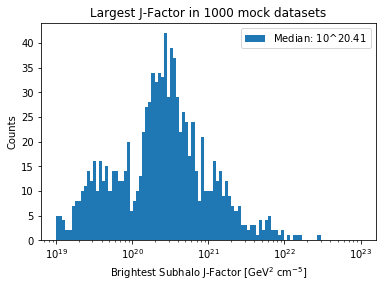

In [24]:
plt.hist(max_J, bins=np.logspace(19,23,100), label="Median: 10^$"+str(round(np.log10(np.median(max_J)), 2))+"$")
plt.xscale("log")
print(np.log10(np.median(max_J)))
plt.title("Largest J-Factor in 1000 mock datasets")
plt.legend()
plt.ylabel("Counts")
plt.xlabel("Brightest Subhalo J-Factor [GeV$^2$ cm$^{-5}$]")
plt.legend()